### **Quantium Virtual Internship - Retail Strategy and Analytics**

#### **Load required libraries and datasets**


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

#### **Loading Datasets**

In [2]:
# loading customer data
df_customer = pd.read_csv('QVI_purchase_behaviour.csv')
df_customer.columns = df_customer.columns.str.lower()
print(df_customer.shape)
df_customer.head()

(72637, 3)


,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
# loading transaction data
df_transaction = pd.read_excel('QVI_transaction_data.xlsx')
df_transaction.columns = df_transaction.columns.str.lower()
print(df_transaction.shape)
df_transaction.head()

(264836, 8)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### **Data Cleaning and EDA**


In [4]:
# checking data types of df_customer columns  
print(df_customer.dtypes)

lylty_card_nbr       int64
lifestage           object
premium_customer    object
dtype: object


##### Datatypes are as expected

In [5]:
# checking data types of df_customer columns  
print(df_transaction.dtypes)

date                int64
store_nbr           int64
lylty_card_nbr      int64
txn_id              int64
prod_nbr            int64
prod_name          object
prod_qty            int64
tot_sales         float64
dtype: object


##### Datatypes are as expected except date column, date is written in integer format (number of days after 30 Dec 1899)

In [6]:
# checking missing values 
print(df_customer.isna().sum())

print(df_transaction.isna().sum())

lylty_card_nbr      0
lifestage           0
premium_customer    0
dtype: int64
date              0
store_nbr         0
lylty_card_nbr    0
txn_id            0
prod_nbr          0
prod_name         0
prod_qty          0
tot_sales         0
dtype: int64


##### There is no missing values

In [7]:
# converting datatype of date column to date from integer
df_transaction['date'] = pd.to_datetime(df_transaction['date'], origin='1899-12-30', unit='D')
print(df_transaction.shape)
df_transaction.head(2)


(264836, 8)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [8]:
print(df_transaction.dtypes)
df_transaction['date'].min(), df_transaction['date'].max()

date              datetime64[ns]
store_nbr                  int64
lylty_card_nbr             int64
txn_id                     int64
prod_nbr                   int64
prod_name                 object
prod_qty                   int64
tot_sales                float64
dtype: object


(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

##### Now, datatype is looking good

In [9]:
# checking summary 
df_transaction.describe()

,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


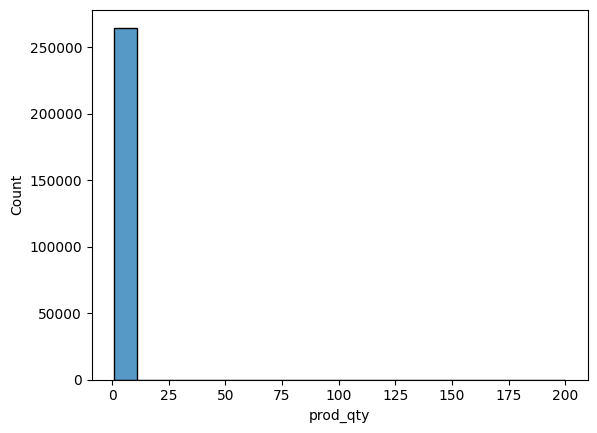

In [10]:
# plotting histogram of product quantity column 
sns.histplot(df_transaction['prod_qty'])
plt.show()

##### It seems that there is outlier in prod_qty column, let check it in more detail

In [11]:
df_transaction['prod_qty'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: prod_qty, dtype: int64

##### As we can see that there are 2 transaction of 200 packets of chips

In [12]:
df_transaction[df_transaction['prod_qty']==200]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


##### There is 1 customer who purchased 200 packets twice, We will remove these 2 transactions from the dataset to avoid bias in analysis

In [13]:
# checking other transaction of this customer
df_transaction[df_transaction['lylty_card_nbr']==226000]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
# Filtering out the customer based on the loyalty card number
df_transaction = df_transaction[df_transaction['lylty_card_nbr']!=226000]


In [15]:
#  Re-examine transaction data
df_transaction.describe()

,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


##### Looks good 

##### Checking total transactions at day level

In [16]:
# Count the number of transactions by date
df_transaction_grp = df_transaction.groupby(['date']).agg(total_transaction = ('txn_id', 'count')).reset_index()
print(df_transaction_grp.shape)
df_transaction_grp.head()

(364, 2)


,date,total_transaction
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712


In [17]:
df_transaction_grp['date'].min(), df_transaction_grp['date'].max()

(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

In [18]:
# creating a sequence of dates from 1 Jul 2018 to 30 Jun 2019

# Define the start and end dates
start_date = '2018-07-01'
end_date = '2019-06-30'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_transaction_each_date = pd.DataFrame({'date': date_range})

# merging it with df_transaction_grp
df_transaction_each_date['date'] = pd.to_datetime(df_transaction_each_date['date']).dt.date
df_transaction_grp['date'] = pd.to_datetime(df_transaction_grp['date']).dt.date


df_transaction_each_date = df_transaction_each_date.merge(df_transaction_grp, on = ['date'], how = 'left')
print(df_transaction_each_date.shape)
df_transaction_each_date.head()

(365, 2)


,date,total_transaction
0,2018-07-01,724.0
1,2018-07-02,711.0
2,2018-07-03,722.0
3,2018-07-04,714.0
4,2018-07-05,712.0


In [19]:
# filling null values with 0
df_transaction_each_date['total_transaction'] = df_transaction_each_date['total_transaction'].fillna(0)

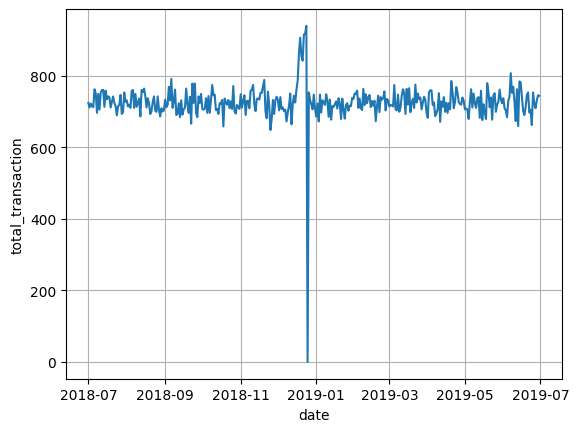

In [20]:
# creating the plot of total_transaction per date
sns.lineplot(data=df_transaction_each_date, x='date', y = 'total_transaction')
plt.grid()
plt.show()

##### Let's zoom in for december month 

In [21]:
# filtering data of december 
df_transaction_each_date_dec = df_transaction_each_date[(df_transaction_each_date['date']>=datetime(2018, 12, 1).date()) & (df_transaction_each_date['date']<=datetime(2018, 12, 31).date())].copy()
df_transaction_each_date_dec = df_transaction_each_date_dec.reset_index(drop = True)
print(df_transaction_each_date_dec.shape)
df_transaction_each_date_dec.head()

(31, 2)


,date,total_transaction
0,2018-12-01,732.0
1,2018-12-02,703.0
2,2018-12-03,740.0
3,2018-12-04,707.0
4,2018-12-05,711.0


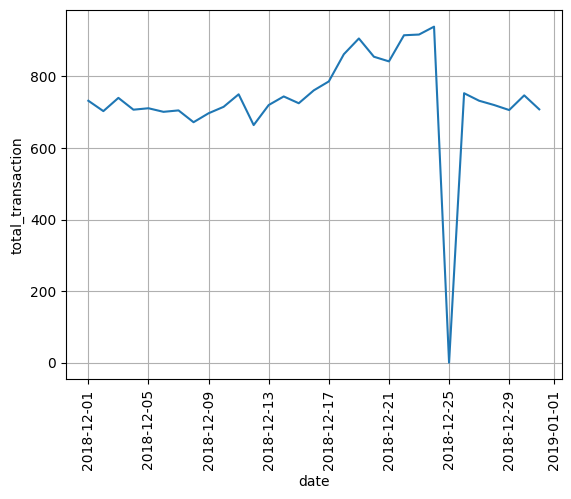

In [22]:
# ploting zoomed plot for december month
sns.lineplot(data=df_transaction_each_date_dec, x='date', y = 'total_transaction')
plt.xticks(rotation=90)
plt.grid()
plt.show()

##### There are 0 transactions on 25 December, looks like all stores were closed on this day

##### Extracting Packet size and brand names from product names

In [23]:
# Extracting packet size from product name
df_transaction['packet_size'] = df_transaction['prod_name'].str.extract(r'(\d+)')
df_transaction['brand'] = df_transaction['prod_name'].str.split().str[0]

print(df_transaction.shape)
df_transaction.head()

(264834, 10)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,packet_size,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [24]:
df_transaction['packet_size'].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', '90', '70'], dtype=object)

In [25]:
df_transaction.isna().sum()

date              0
store_nbr         0
lylty_card_nbr    0
txn_id            0
prod_nbr          0
prod_name         0
prod_qty          0
tot_sales         0
packet_size       0
brand             0
dtype: int64

Text(0, 0.5, 'Total Transactions')

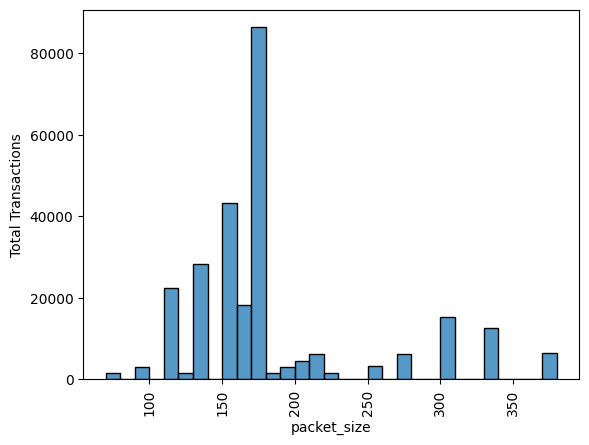

In [32]:
# checking histogram of packet size 

df_transaction['packet_size'] = df_transaction['packet_size'].astype(int)
sns.histplot(df_transaction['packet_size'], binwidth=10)
plt.xticks(rotation=90)
plt.ylabel("Total Transactions")

In [28]:
# Extracting top 10 brand in terms of quantity sold
df_transaction_grp = df_transaction.groupby(['brand']).agg(total_qty_sold = ('prod_qty', 'sum')).reset_index()
df_transaction_grp = df_transaction_grp.sort_values(by = ['total_qty_sold'], ascending = False).head(10)
df_transaction_grp

,brand,total_qty_sold
12,Kettle,79051
20,Smiths,54730
16,Pringles,48019
6,Doritos,47707
23,Thins,26929
17,RRD,22500
10,Infuzions,21119
27,WW,19461
4,Cobs,18571
24,Tostitos,18134


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kettle'),
  Text(1, 0, 'Smiths'),
  Text(2, 0, 'Pringles'),
  Text(3, 0, 'Doritos'),
  Text(4, 0, 'Thins'),
  Text(5, 0, 'RRD'),
  Text(6, 0, 'Infuzions'),
  Text(7, 0, 'WW'),
  Text(8, 0, 'Cobs'),
  Text(9, 0, 'Tostitos')])

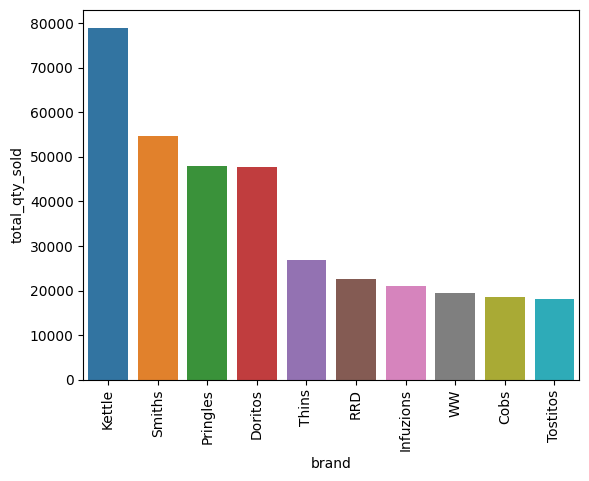

In [30]:
# plotting above data 
sns.barplot(data = df_transaction_grp, x = 'brand', y = 'total_qty_sold')
plt.xticks(rotation=90)

##### Kettle brand is getting sold in large quantity as compare to other brands

In [33]:
# analysing customer data
df_customer.head()

,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Text(0, 0.5, 'Total Customers')

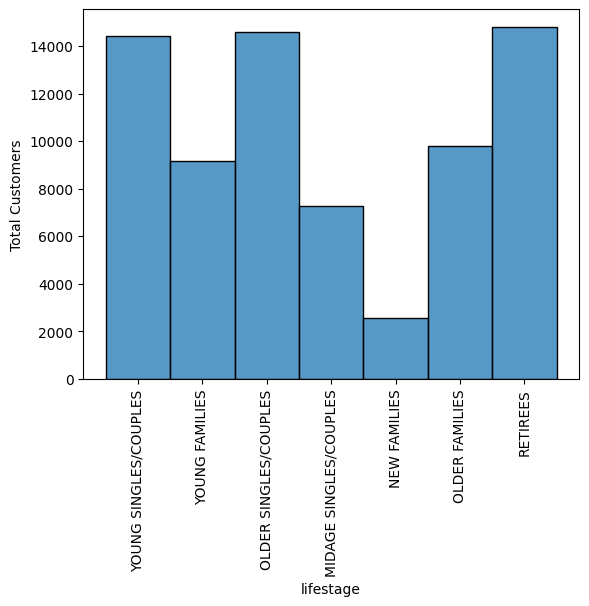

In [34]:
sns.histplot(df_customer['lifestage'])
plt.xticks(rotation=90)
plt.ylabel("Total Customers")

Text(0, 0.5, 'Total Customers')

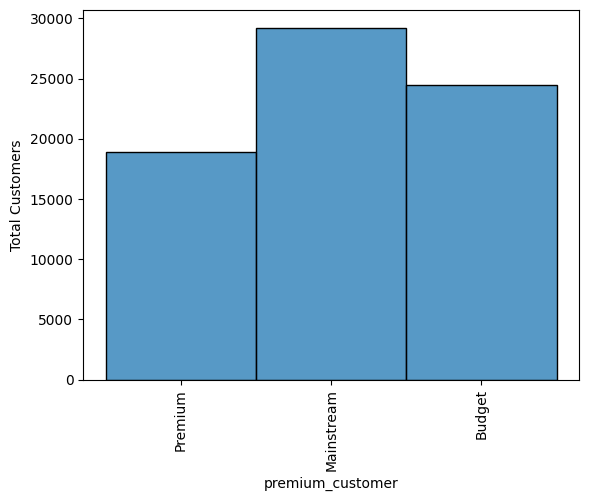

In [35]:
sns.histplot(df_customer['premium_customer'])
plt.xticks(rotation=90)
plt.ylabel("Total Customers")

In [37]:
# merging transaction data with customer data
print(df_transaction.shape)
df_transaction = df_transaction.merge(df_customer, on = ['lylty_card_nbr'], how = 'left')
print(df_transaction.shape)
df_transaction.head()

(264834, 10)


(264834, 12)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,packet_size,brand,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [38]:
df_transaction.isna().sum()

date                0
store_nbr           0
lylty_card_nbr      0
txn_id              0
prod_nbr            0
prod_name           0
prod_qty            0
tot_sales           0
packet_size         0
brand               0
lifestage           0
premium_customer    0
dtype: int64

In [39]:
# calculating metrics at lifestage and premium_customer level
df_transaction_grp = df_transaction.groupby(['lifestage', 'premium_customer']).agg(total_sales = ('tot_sales', 'sum'), total_customers = ('lylty_card_nbr', 'nunique'), total_chips = ('prod_qty', 'sum')).reset_index()

df_transaction_grp['chips_per_customer'] = df_transaction_grp['total_chips'].div(df_transaction_grp['total_customers'].where(df_transaction_grp['total_customers']!=0, np.nan))
df_transaction_grp['price_per_chip'] = df_transaction_grp['total_sales'].div(df_transaction_grp['total_chips'].where(df_transaction_grp['total_chips']!=0, np.nan))


print(df_transaction_grp.shape)
df_transaction_grp.head()


(21, 7)


,lifestage,premium_customer,total_sales,total_customers,total_chips,chips_per_customer,price_per_chip
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,1504,9496,6.313830,3.739975
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,3340,22699,6.796108,4.000346
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,2431,15526,6.386672,3.763535
3,NEW FAMILIES,Budget,21928.45,1112,5571,5.009892,3.936178
4,NEW FAMILIES,Mainstream,17013.90,849,4319,5.087161,3.939315


In [40]:
df_transaction_grp.sort_values( by = ['total_sales'], ascending = False)

,lifestage,premium_customer,total_sales,total_customers,total_chips,chips_per_customer,price_per_chip
6,OLDER FAMILIES,Budget,168363.25,4675,45065,9.639572,3.736009
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60,8088,38632,4.776459,4.080079
13,RETIREES,Mainstream,155677.05,6479,40518,6.253743,3.842170
15,YOUNG FAMILIES,Budget,139345.85,4017,37111,9.238486,3.754840
9,OLDER SINGLES/COUPLES,Budget,136769.80,4929,35220,7.145466,3.883299
10,OLDER SINGLES/COUPLES,Mainstream,133393.80,4930,34997,7.098783,3.811578
11,OLDER SINGLES/COUPLES,Premium,132263.15,4750,33986,7.154947,3.891695
12,RETIREES,Budget,113147.80,4454,28764,6.458015,3.933660
7,OLDER FAMILIES,Mainstream,103445.55,2831,27756,9.804309,3.726962
14,RETIREES,Premium,97646.05,3872,24884,6.426653,3.924050


##### Conclusion - 
(1) Most sales coming from OLDER FAMILIES - Budget, YOUNG SINGLES/COUPLES - Mainstream, RETIREES - Mainstream, These segment also has good numbers of customers. We can target these segments to increase the revenue. 

(2) Segments like OLDER FAMILIES - Budget, YOUNG FAMILIES - Budget, OLDER FAMILIES - Mainstream, YOUNG FAMILIES	Mainstream etc .. has more chips per customers, means they purchage in large quantity as compare to other segments.

(3) Segments like YOUNG SINGLES/COUPLES-Mainstream, MIDAGE SINGLES/COUPLES - Mainstream	has more price per chip number, means they spend more amount per chip than other segements. May be we can target these segmemnts if want to sell expensive chips.



In [95]:
# Lets deep dive into Mainstream, young singles/couples
df_transaction_filt = df_transaction[(df_transaction['lifestage']=='YOUNG SINGLES/COUPLES') & (df_transaction['premium_customer']=='Mainstream')].copy()
print(df_transaction_filt.shape)
df_transaction_filt.head()

(19544, 13)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_name_filt,packet_size,brand,lifestage,premium_customer
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,Smiths Crinkle Cut SnagSauce g,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream
221346,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,Kettle Original g,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream
221347,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,WW Supreme Cheese Corn Chips g,200,WW,YOUNG SINGLES/COUPLES,Mainstream
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,Smiths Crnkle Chip Orgnl Big Bag g,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,Pringles Mystery Flavour g,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream


In [98]:
df_transaction_filt['brand'].value_counts()

Kettle        3844
Pringles      2315
Doritos       2076
Smiths        1790
Thins         1166
Infuzions      962
Twisties       900
Tostitos       890
RRD            875
Cobs           864
Tyrrells       619
Grain          576
WW             423
Cheezels       346
Natural        321
Dorito         303
Infzns         288
CCs            222
Cheetos        166
Smith          131
French          78
NCC             73
Snbts           71
GrnWves         70
Burger          62
Sunbites        57
Woolworths      56
Name: brand, dtype: int64

In [ ]:
# most common brands for this segment are - Kettle, Pringles, Doritos

In [96]:
df_transaction_filt['packet_size'].value_counts()

175    4997
150    3080
134    2315
110    2051
170    1575
330    1195
165    1102
380     626
270     620
210     576
135     290
250     280
200     179
190     148
90      128
160     128
180      70
70       63
220      62
125      59
Name: packet_size, dtype: int64

In [97]:
# they prefer 175g, 150g, 134g packets